Take Home Assignment 02, INDEX NO : EGT/20/572,  NAME: N.Thenushan

1. Plot of the liquid level


In [49]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

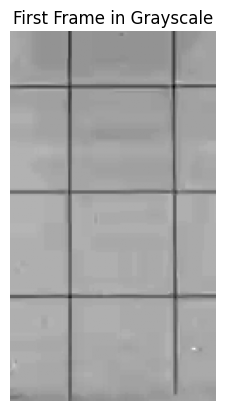

In [ ]:
# Open the video file
video_path = 'liquidVideo.mp4'  # Update with the actual video path
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Initialize lists to store liquid levels (percentage and pixel area)
liquid_levels_percentage = []
liquid_levels_pixels = []

# Read the first frame as the background image (frame 0)
ret, img_b = cap.read()
if not ret:
    print("Error: Couldn't read the first frame.")
    exit()

# Convert the first frame to grayscale
img_b_gray = cv2.cvtColor(img_b, cv2.COLOR_BGR2GRAY)


plt.imshow(img_b_gray, cmap='gray')
plt.title('First Frame in Grayscale')
plt.axis('off')
plt.show()

frame_count = 0  # Frame counter

In [51]:
# Loop through the video frames
while True:
    ret, img_r = cap.read()
    if not ret:
        break  # End of video

    # Convert current frame to grayscale
    img_r_gray = cv2.cvtColor(img_r, cv2.COLOR_BGR2GRAY)

    # Subtract the background image from the current frame
    img_sub = cv2.subtract(img_b_gray, img_r_gray)

    # Thresholding to get a binary image
    ret, img_sub_thresh = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


    # Find contours in the thresholded image
    contours, hierarchy = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Sort the contours by area, descending order
    contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)


    # Calculate the area of the largest contour
    rows, cols = img_sub_thresh.shape
    total_area = rows * cols

    
    if contours:
        largest_contour_area = cv2.contourArea(contours[0])
        liquid_level_percentage = round((largest_contour_area / total_area) * 100, 1)
        liquid_level_pixel = largest_contour_area  # Pixel area of the largest contour
    else:
        liquid_level_percentage = 0  # No contour detected, liquid level is 0
        liquid_level_pixel = 0

    # Store the liquid level for plotting
    liquid_levels_percentage.append(liquid_level_percentage)
    liquid_levels_pixels.append(liquid_level_pixel)

    # Increment frame count
    frame_count += 1
    

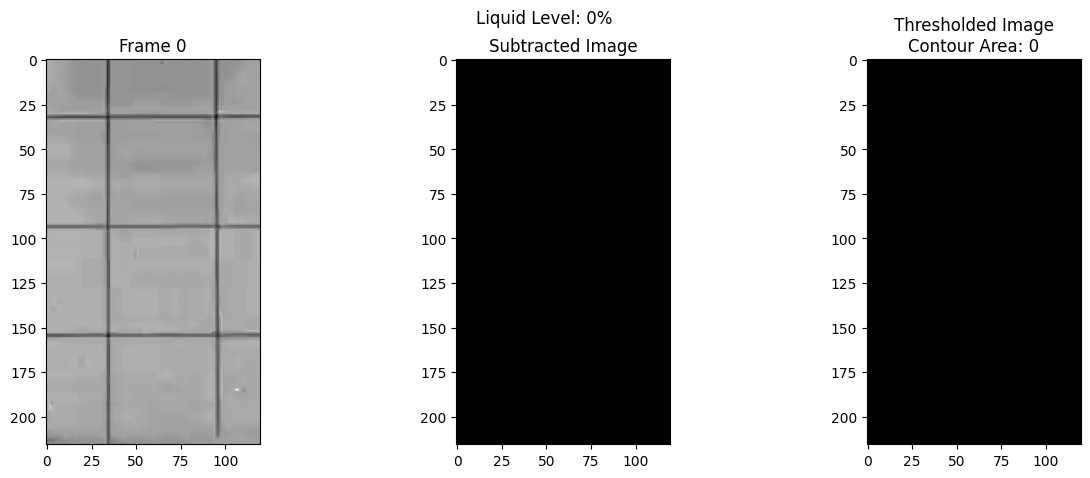

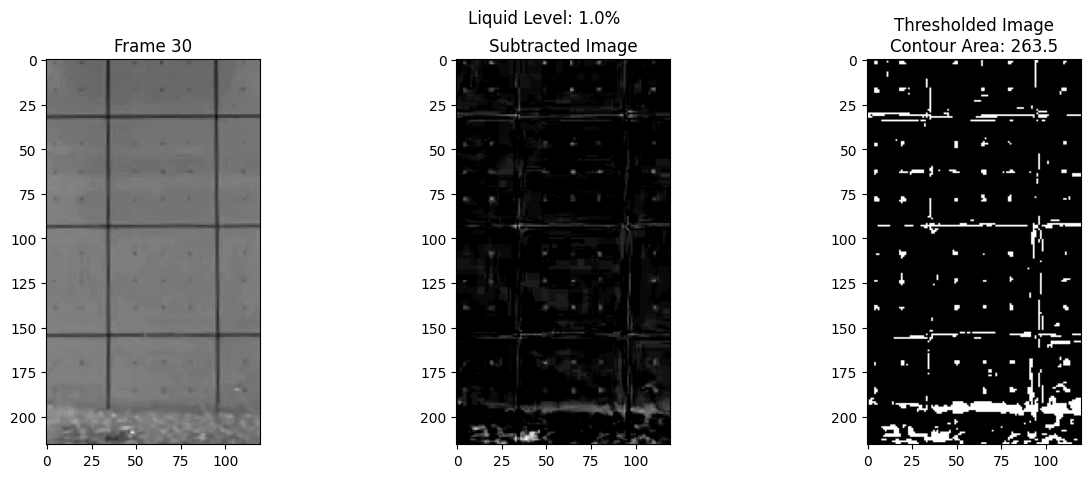

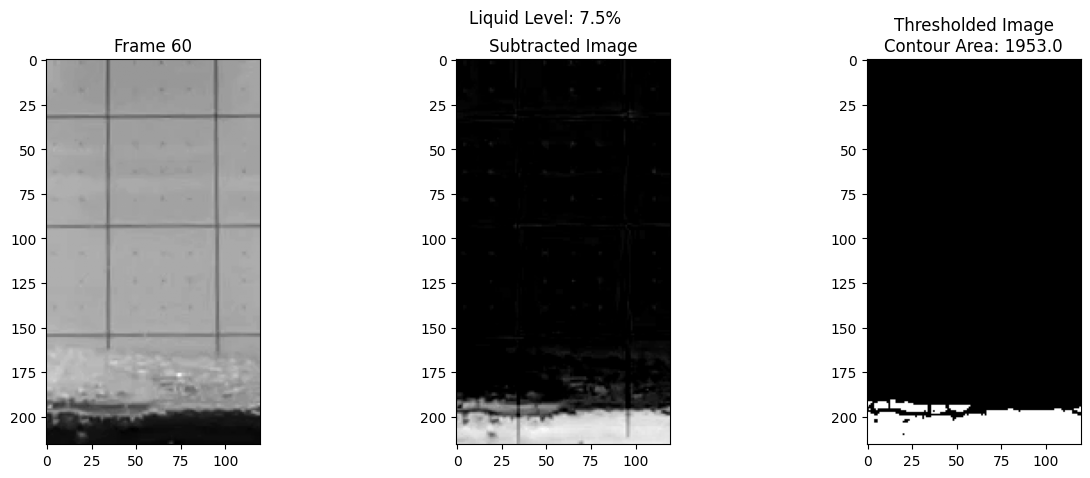

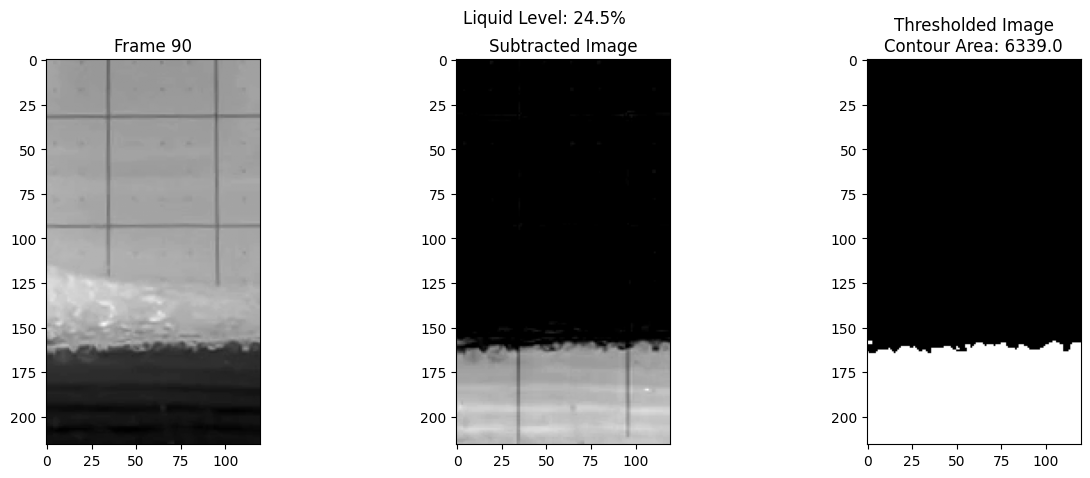

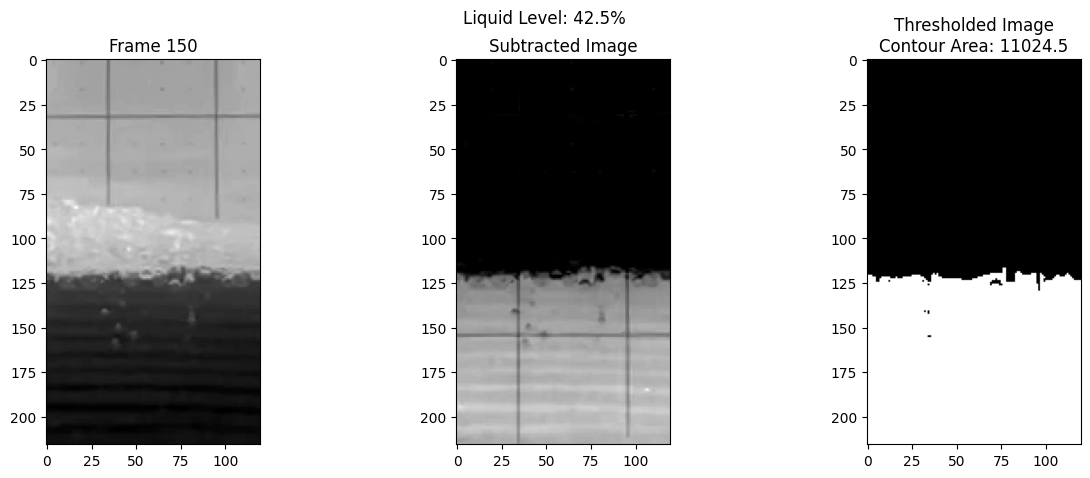

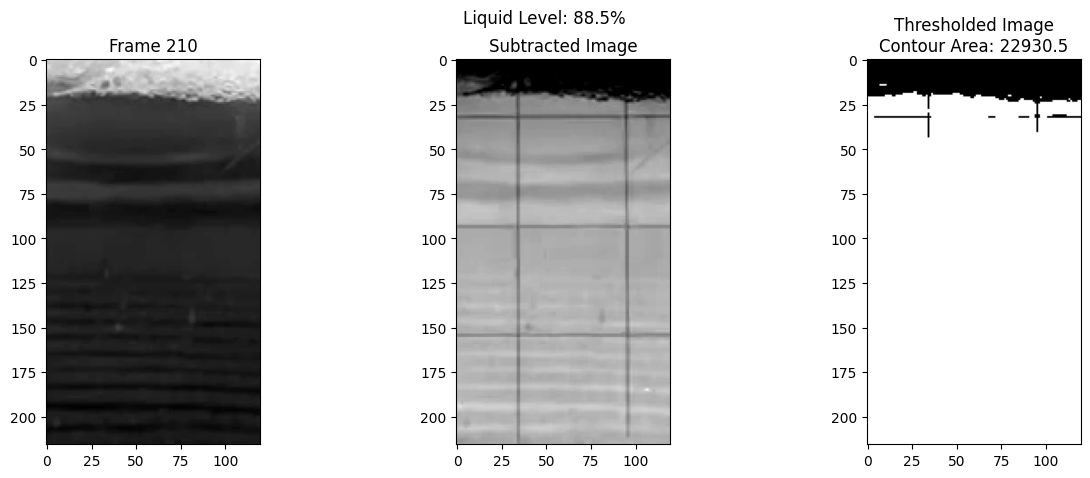

In [ ]:
# Show the processed image visualizations purpose only
import random

# Select 6 random frame indices with +30 interval in ascending order
random_indices = sorted(random.sample(range(0, frame_count, 30), 6))

for idx in random_indices:
    # Set the video capture to the specific frame index
    cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
    
    # Read the frame
    ret, frame = cap.read()
    if not ret:
        continue
    
    # Convert the frame to grayscale
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Subtract the background from the current frame
    img_sub = cv2.subtract(img_b_gray, frame_gray)
    
    # Thresholding to get a binary image
    ret, img_th = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Find contours in the thresholded image
    contours, hierarchy = cv2.findContours(img_th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Sort the contours by size in descending order
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
    # Calculate the area of the largest contour
    if contours:
        largest_contour_area = cv2.contourArea(contours[0])
        liquid_level_percentage = round((largest_contour_area / total_area) * 100, 1)
    else:
        largest_contour_area = 0
        liquid_level_percentage = 0  # No contour detected, liquid level is 0
    
    # Plot the images
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.title(f'Frame {idx}')
    plt.imshow(frame_gray, cmap='gray')
    
    plt.subplot(1, 3, 2)
    plt.title('Subtracted Image')
    plt.imshow(img_sub, cmap='gray')
    
    plt.subplot(1, 3, 3)
    plt.title(f'Thresholded Image\nContour Area: {largest_contour_area}')
    plt.imshow(img_th, cmap='gray')
    
    plt.suptitle(f'Liquid Level: {liquid_level_percentage}%')
    plt.show()

# Release the video capture when done
cap.release()

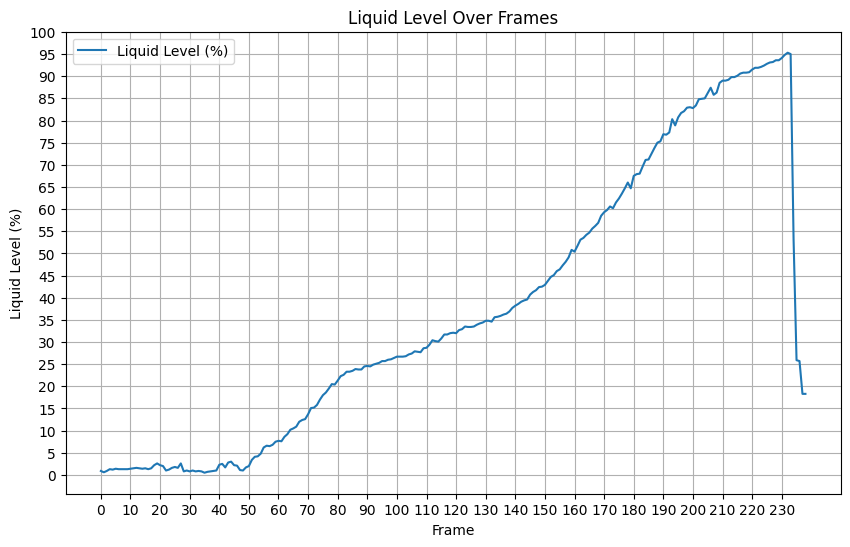

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(range(frame_count), liquid_levels_percentage, label='Liquid Level (%)')
plt.xlabel('Frame')
plt.ylabel('Liquid Level (%)')
plt.title('Liquid Level Over Frames')
plt.legend()
plt.grid(True)

# Set more divisions on x and y axes
plt.xticks(np.arange(0, frame_count, step=10))
plt.yticks(np.arange(0, 101, step=5))

plt.show()

2. A brief note on what the student understood by reading the section on Otsu's threholding method.


Otsu's Thresholding is a widely used technique in image processing for automatic image segmentation. The goal of the method is to determine an optimal threshold that separates the image into two classes—typically foreground and background—based on pixel intensity. The method is called automatic because the threshold is calculated directly from the image’s histogram without user intervention, making it suitable for applications where manual threshold selection is impractical.

How It Works

Otsu’s method works by calculating the histogram of pixel intensities and then iteratively testing different threshold values to maximize the between-class variance. The method assumes that the image has a bimodal intensity distribution, meaning that the pixel intensities are clustered around two distinct peaks: one for the foreground and one for the background. By maximizing the variance between these two classes, Otsu’s method ensures that the chosen threshold provides the best separation between them.

Benefits:
1. Automatic: No need for user input, making it ideal for real-time or large-scale image processing.
2. Efficient: The algorithm is computationally efficient, with a time complexity of O(N), where N is the number of pixels.
3. Robust: It works well for images with a clear bimodal intensity distribution (two peaks in the histogram).

Limitations:
1. Assumes Bimodal Histogram: Otsu’s method performs best when the image has a bimodal histogram. For images with unimodal or multimodal histograms, the method may not give optimal results.
2. Sensitive to Noise: Noise or uneven lighting can distort the histogram, leading to suboptimal thresholding.

Process on opencv and reomve noise

1. Thresholding Process: Using the cv.threshold() function with the cv.THRESH_OTSU flag allows Otsu’s method to find the optimal threshold value based on the image's histogram.

2. Effect of Noise: Noise can affect thresholding results, but applying a Gaussian filter (such as a 5x5 kernel) before Otsu’s thresholding can improve the output by reducing noise and leading to a cleaner segmentation.

3. . In summary, the student has understood that Otsu's method is a more intelligent, automatic way to select a threshold for image segmentation, and preprocessing (like noise removal) can significantly improve the results.

3. 2 examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images.

Observation of Major Erroneous Regions in the Plot          



![Liquid Level Image](2.png)




E1. Fluctuations Due to Bubbles (0–234 Frames)

(Sample frame error due to bubble)

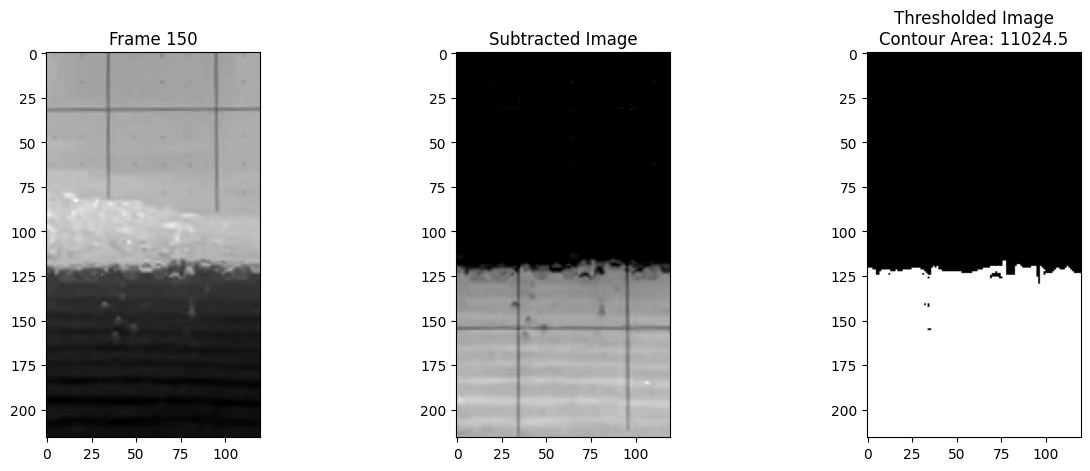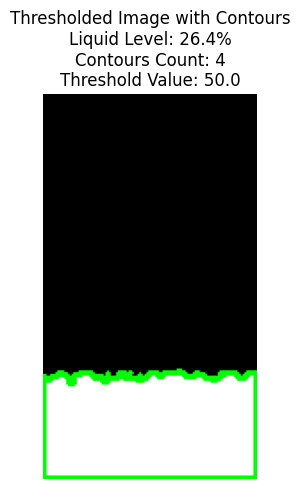

1. In the first 234 frames, the liquid level in the real video shows continuous growth.The plot, however, exhibits fluctuations caused by interference from bubbles in the liquid.

2. The bubbles have a background color nearly identical to the bubbles, although the fluid is horizontally at the same level, the bubbles make the subtracted image appear to have uneven edges. 

3. The THRESH_OTSU method produces more contours due to its automatic thresholding, which leads to the detection of smaller, irrelevant contours. The highest-value contour is then selected, but this can still be influenced by noise or distortions, such as bubbles, which can result in erroneous readings or inaccurate tracking of the liquid level.

3. This distortion leads to inaccurate contour detection and contributes to the fluctuations observed in the plot.

E2. Post-234th Frame Decrease

(Sample frame error due to Water full)
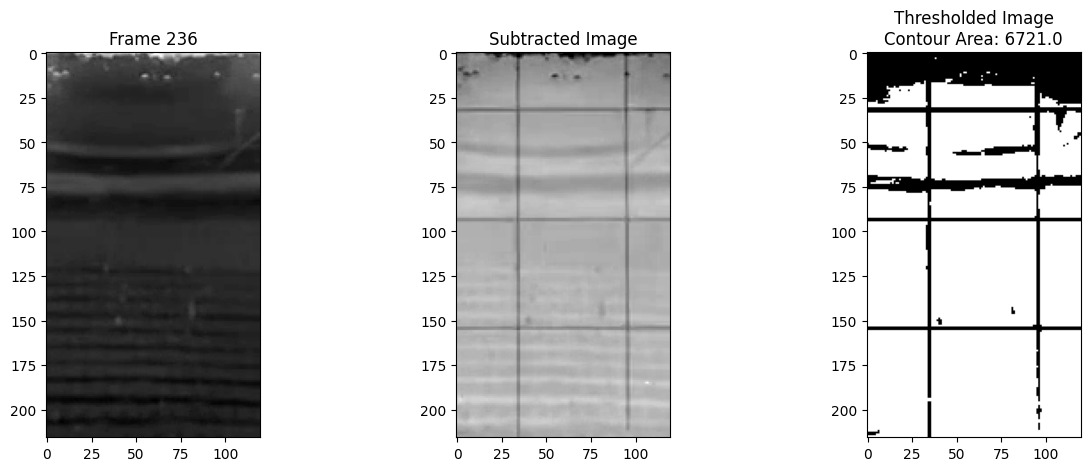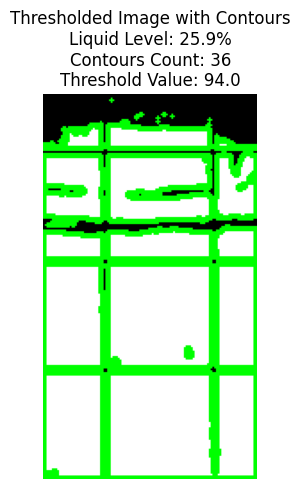

1. A significant erroneous region is observed after the 234th frame, where the liquid percentage in the plot shows a decrease despite the liquid level in the real video full.

2. After the 234th frame, when most of the liquid was filled, the subtracted image displayed black grid lines in the background. These small square grids became visible in the thresholded image.

3. This error is caused by the limitations of Otsu's thresholding method During contouring The THRESH_OTSU method struggled to differentiate the background accurately and set the threshold value at around 88%. This caused the black grid lines in the background to appear as separate contours.

4. The presence of these grids caused the contours in the thresholded image to split into multiple fragments. Consequently, when the largest contour was selected, only the largest fragment of the split contours was chosen. This is why the plotted graph showed a decrease after the 234th frame.


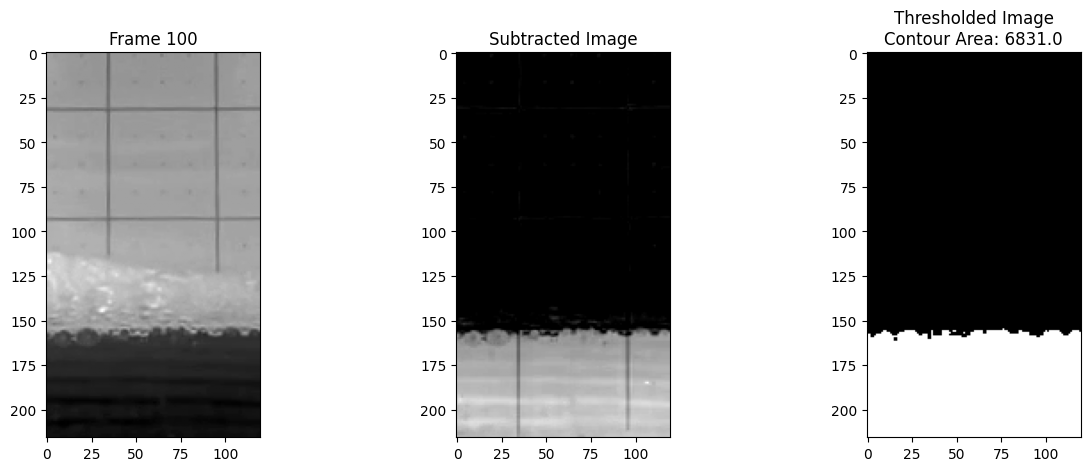

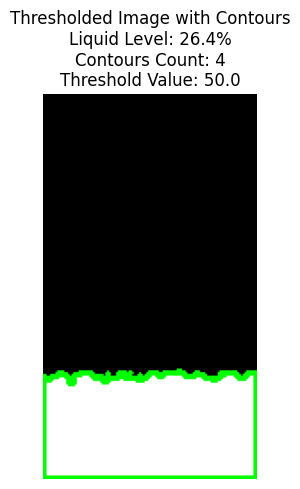

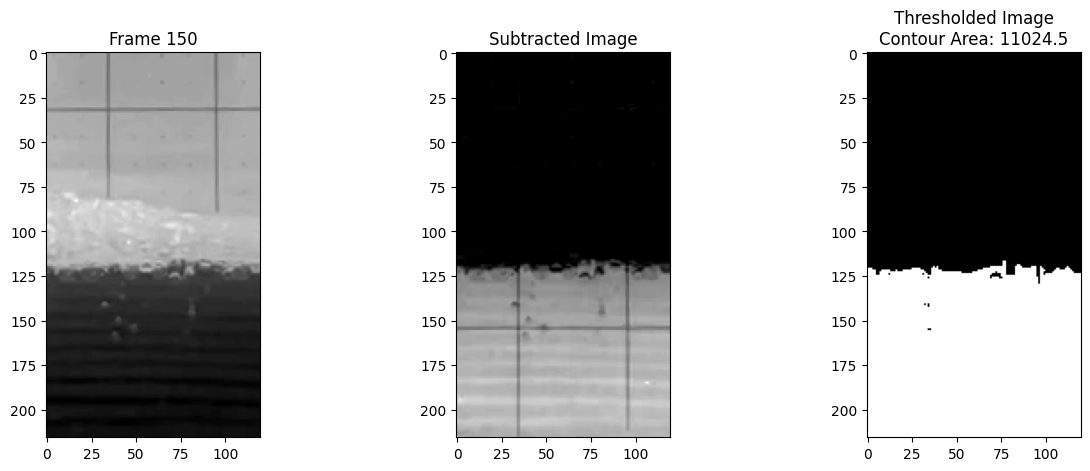

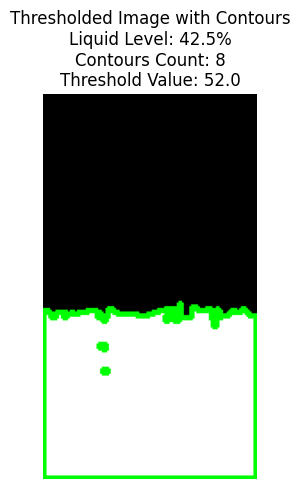

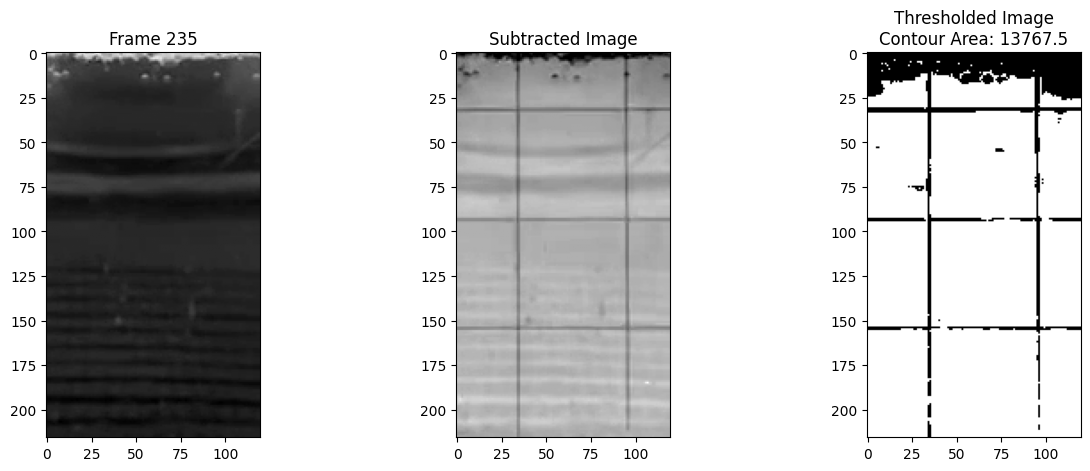

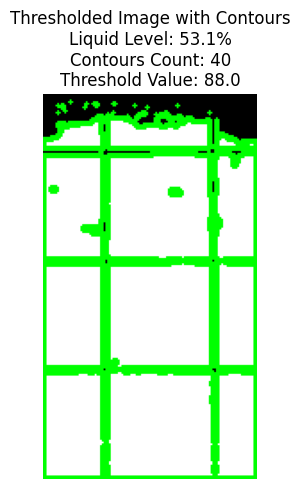

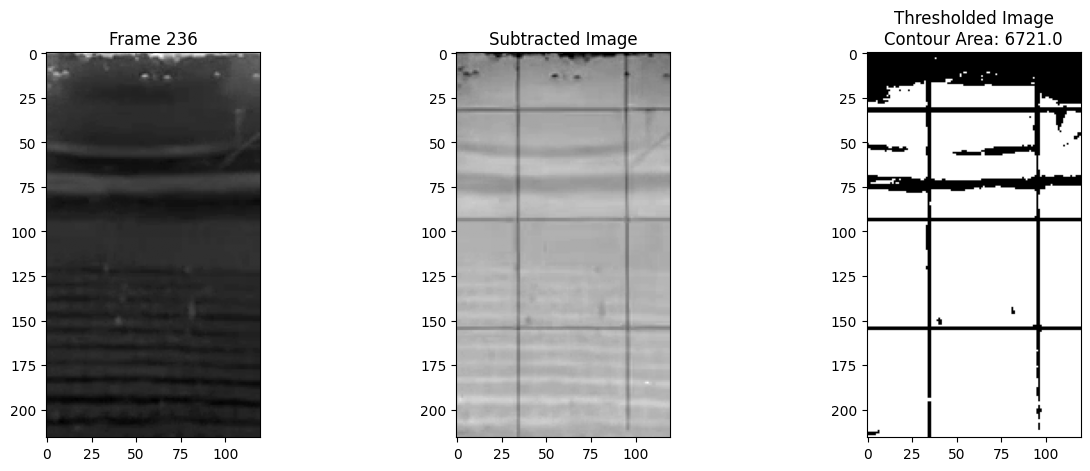

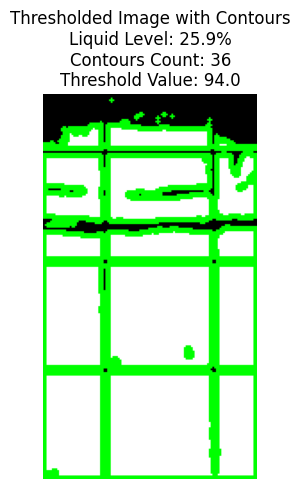

In [ ]:
#Analysis part

#  Select same  frames with probable erroneous readings
erroneous_frames = [100, 150, 235, 236]  # Example frame indices with probable errors

for idx in erroneous_frames:
    # Set the video capture to the specific frame index
    cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
    
    # Read the frame
    ret, frame = cap.read()
    if not ret:
        continue
    
    # Convert the frame to grayscale
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Subtract the background from the current frame
    img_sub = cv2.subtract(img_b_gray, frame_gray)
    
    # Thresholding to get a binary image
    ret, img_th = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Find contours in the thresholded image
    contours, hierarchy = cv2.findContours(img_th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Sort the contours by size in descending order
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
    # Calculate the area of the largest contour
    if contours:
        largest_contour_area = cv2.contourArea(contours[0])
        liquid_level_percentage = round((largest_contour_area / total_area) * 100, 1)
    else:
        largest_contour_area = 0
        liquid_level_percentage = 0  # No contour detected, liquid level is 0
    
    # Plot the images
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.title(f'Frame {idx}')
    plt.imshow(frame_gray, cmap='gray')
    
    plt.subplot(1, 3, 2)
    plt.title('Subtracted Image')
    plt.imshow(img_sub, cmap='gray')
    
    plt.subplot(1, 3, 3)
    plt.title(f'Thresholded Image\nContour Area: {largest_contour_area}')
    plt.imshow(img_th, cmap='gray')
    
    plt.show()
    
    # Remove the annotated frame part
    annotated_frame = None
    
    # Draw contours on the thresholded image
    img_th_contours = cv2.cvtColor(img_th, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(img_th_contours, contours, -1, (0, 255, 0), 2)

    # Plot the thresholded image with highlighted contours
    plt.figure(figsize=(15, 5))
    plt.imshow(img_th_contours)
    plt.title(f'Thresholded Image with Contours\nLiquid Level: {liquid_level_percentage}%\nContours Count: {len(contours)}\nThreshold Value: {ret}')
    plt.axis('off')
    plt.show()


4. A brief description on the final algorithm developed by the student.

1. Video Capture Initialization
The video file is opened using OpenCV's cv2.VideoCapture(), and processing begins if successful.

2. First Frame as Background
The first frame is read and converted to grayscale, serving as the "background" to detect changes in liquid level.

3. Initialize Data Storage
Two lists are initialized:
* liquid_levels_percentage: Stores liquid level as a percentage.
* liquid_levels_pixels: Stores liquid level in pixel area.

4. Frame Processing Loop
For each frame:
* Grayscale Conversion: Convert the frame to grayscale.
* Background Subtraction: Subtract the background to highlight liquid changes.
* Thresholding with Otsu's Method: Binarize the image to separate liquid (white) and background (black).
* Contour Detection: Detect contours representing liquid regions.
* Sorting Contours: Sort by area to select the largest contour, representing the liquid surface.

5. Liquid Level Calculation
* Contour Area: Calculate the area of the largest contour.
* Liquid Level Percentage: Calculate the percentage of liquid by comparing contour area to total frame area.
* Data Storage: Append the results to the respective lists.

6. Plotting the Liquid Level
After processing, plot the liquid level data (percentage and pixel area) over time.